In [3]:
# Pandas
import pandas as pd

# SQL Alchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
#create salary sqlite
engine = create_engine("sqlite:///salary.sqlite", echo=False)

In [5]:
#create title sqlite
engine2 = create_engine("sqlite:///title.sqlite", echo=False)

In [6]:
#read csvs
salary_df = pd.read_csv("../data/salaries.csv")
titles_df = pd.read_csv("../data/titles.csv")

In [7]:
#connect salary engine
engine = create_engine(f"sqlite:///{salary_df}")
conn = engine.connect()

In [8]:
#connect title engine
engine2 = create_engine(f"sqlite:///{titles_df}")
conn2 = engine.connect()

In [9]:
#convert salary csv to sql
salary_df.to_sql("salary",conn)

ValueError: Table 'salary' already exists.

In [25]:
#convert title csv to sql
titles_df.to_sql("title", conn2)

In [10]:
#check salary file data
salary_data = pd.read_sql("SELECT * FROM salary", conn)
salary_data.head()

,index,emp_no,salary,from_date,to_date
0,0,10001,60117,6/26/86,6/26/87
1,1,10002,65828,8/3/96,8/3/97
2,2,10003,40006,12/3/95,12/2/96
3,3,10004,40054,12/1/86,12/1/87
4,4,10005,78228,9/12/89,9/12/90


In [11]:
#check title file data
title_data = pd.read_sql("SELECT * FROM title", conn2)
title_data.head()

,index,emp_no,title,from_date,to_date
0,0,10001,Senior Engineer,6/26/86,1/1/99
1,1,10002,Staff,8/3/96,1/1/99
2,2,10003,Senior Engineer,12/3/95,1/1/99
3,3,10004,Engineer,12/1/86,12/1/95
4,4,10004,Senior Engineer,12/1/95,1/1/99


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 12,10
%config InlineBackend.figure_formats =['retina']

In [32]:
#Create salary bins  
bins = [0, 49000, 59000, 69000, 79000, 89000, 99000, 109000, 119000, 130000]

# Create the names for the salary bins
group_names = ["<50K", "50K-60K", "60K-70K", "70K-80K", "80K-90K", "90K-100K", "100K-110K", "110K-120K", ">120K"]


In [33]:
#add salary groups
salary_data["Salary_Range"] = pd.cut(salary_data["salary"], bins, labels=group_names)

In [34]:
salary_data.head()

,index,emp_no,salary,from_date,to_date,Salary_Range
0,0,10001,60117,6/26/86,6/26/87,60K-70K
1,1,10002,65828,8/3/96,8/3/97,60K-70K
2,2,10003,40006,12/3/95,12/2/96,<50K
3,3,10004,40054,12/1/86,12/1/87,<50K
4,4,10005,78228,9/12/89,9/12/90,70K-80K


In [35]:
# Create a group based on the values in the new range column
range_group = salary_data.groupby('Salary_Range')

# Count how many times each range appears 
count_ranges = range_group['Salary_Range'].count()

count_ranges

Salary_Range
<50K         152091
50K-60K       59273
60K-70K       43086
70K-80K       26407
80K-90K       12826
90K-100K       4847
100K-110K      1220
110K-120K       244
>120K            30
Name: Salary_Range, dtype: int64

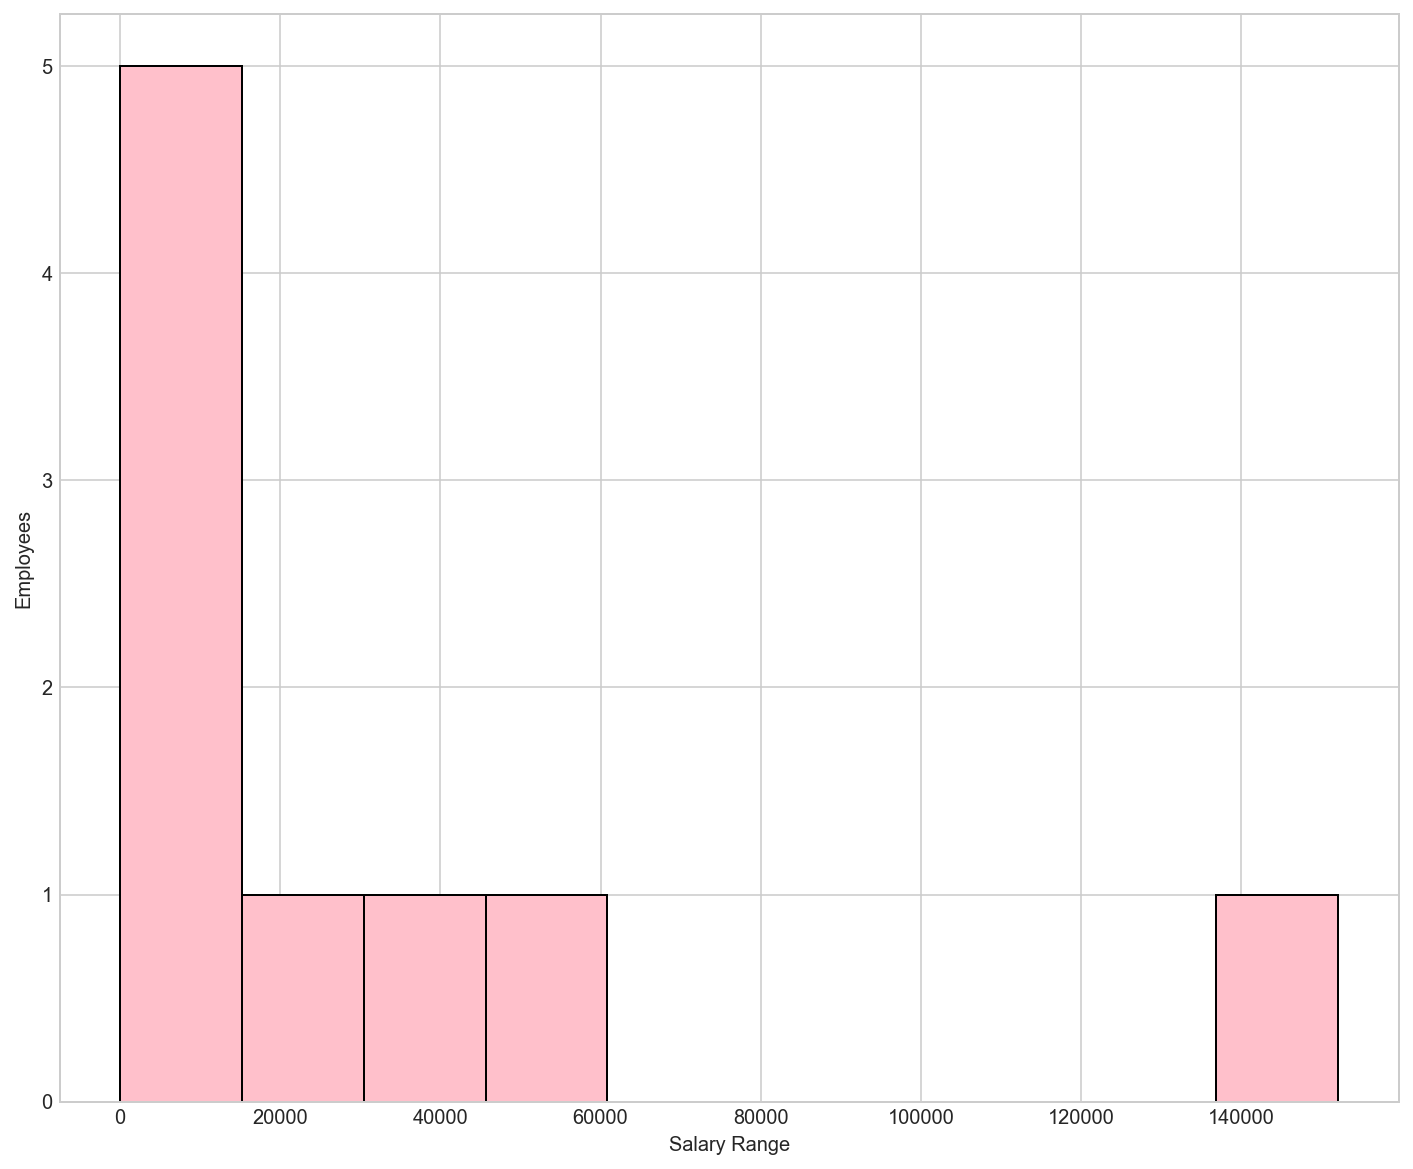

<Figure size 864x720 with 0 Axes>

In [38]:
#2. Create a histogram to visualize the most common salary ranges for employees.
salary_chart = count_ranges.plot(kind='hist', color = "pink", ec="black")

# Set the xlabel and ylabel using class methods
salary_chart.set_xlabel("Salary Range")
salary_chart.set_ylabel("Employees")

rcParams['figure.figsize'] = 12,10
%config InlineBackend.figure_formats =['retina']
plt.rc('lines', linewidth=1)
plt.style.use('seaborn-whitegrid')

plt.show()
plt.tight_layout()

In [37]:
#combine salary and title
combined_df = pd.merge(salary_data, title_data, how='inner', on='emp_no')
combined_df.head()

,index_x,emp_no,salary,from_date_x,to_date_x,Salary_Range,index_y,title,from_date_y,to_date_y
0,0,10001,60117,6/26/86,6/26/87,60K-70K,0,Senior Engineer,6/26/86,1/1/99
1,1,10002,65828,8/3/96,8/3/97,60K-70K,1,Staff,8/3/96,1/1/99
2,2,10003,40006,12/3/95,12/2/96,<50K,2,Senior Engineer,12/3/95,1/1/99
3,3,10004,40054,12/1/86,12/1/87,<50K,3,Engineer,12/1/86,12/1/95
4,3,10004,40054,12/1/86,12/1/87,<50K,4,Senior Engineer,12/1/95,1/1/99


In [41]:
#group by title
title_group = combined_df.groupby('title')

# average salarys
avg_salary = title_group['salary'].mean()

avg_salary

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

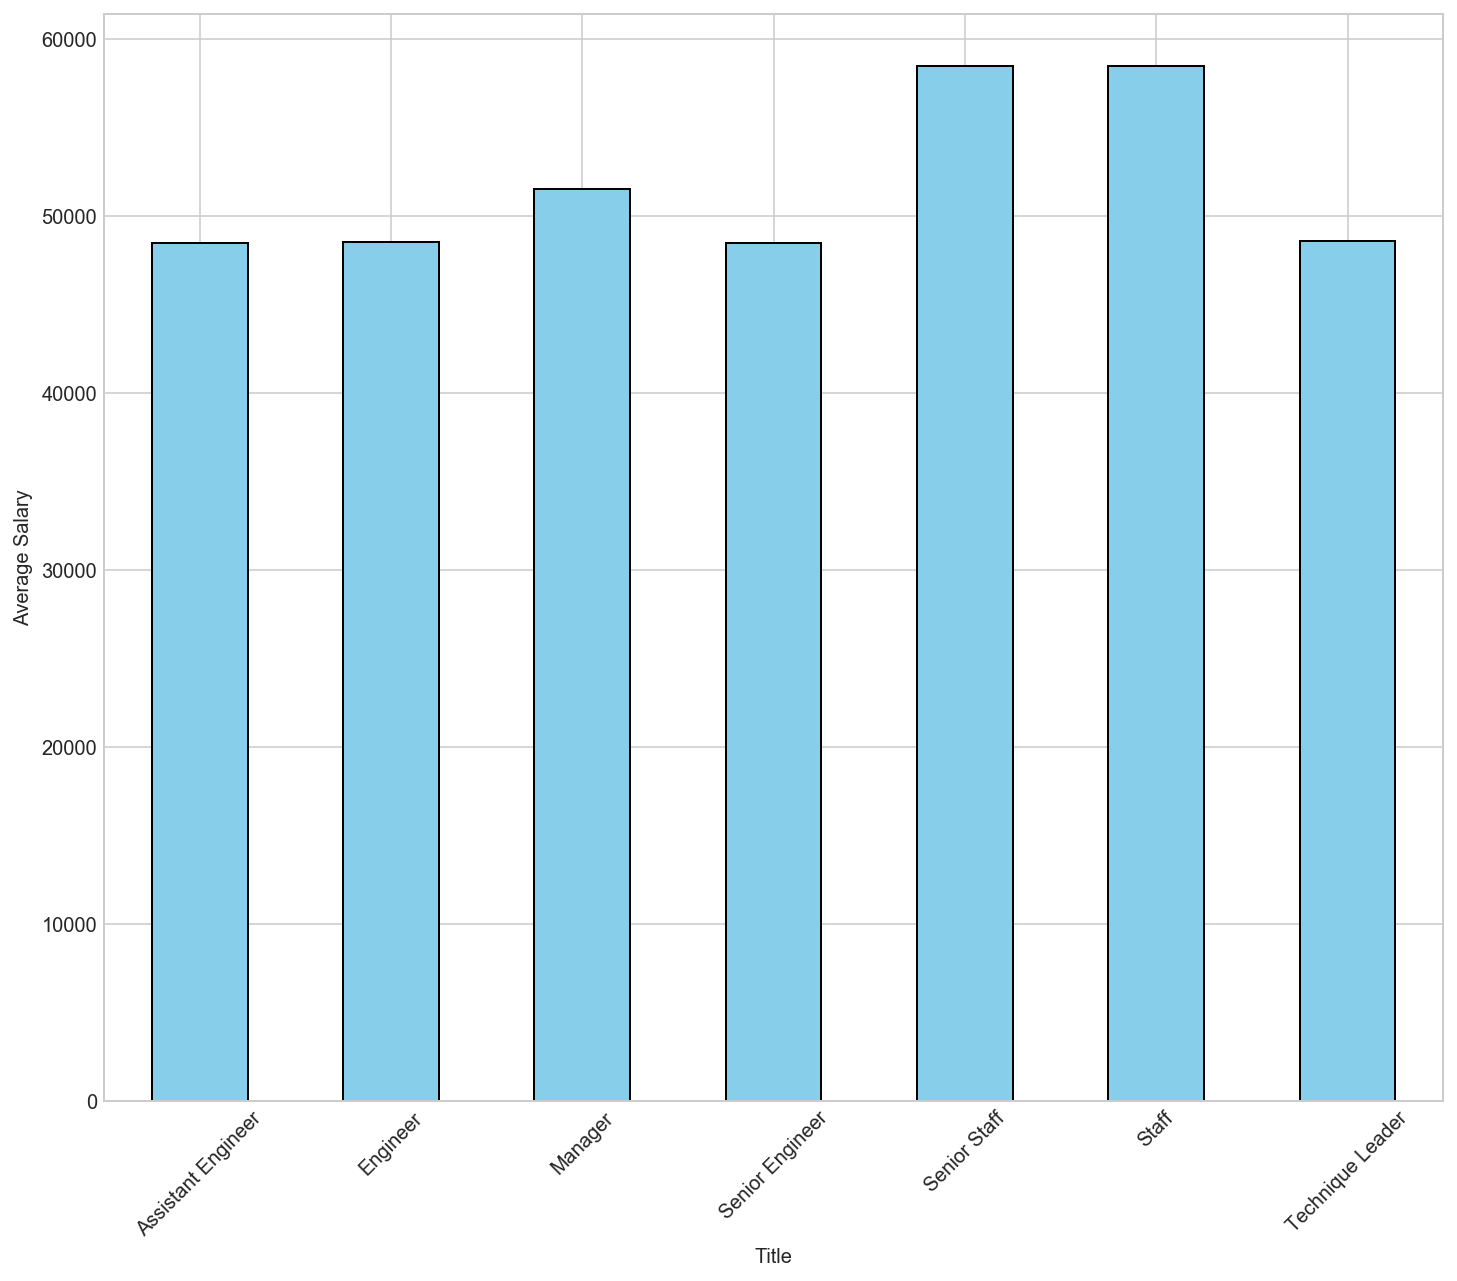

<Figure size 864x720 with 0 Axes>

In [46]:
#3. Create a bar chart of average salary by title.
title_chart = avg_salary.plot(kind='bar', color = "skyblue", ec="black")

# Set the xlabel and ylabel using class methods
title_chart.set_xlabel("Title")
title_chart.set_ylabel("Average Salary")
plt.xticks(rotation=45)

rcParams['figure.figsize'] = 12,10
%config InlineBackend.figure_formats =['retina']
plt.rc('lines', linewidth=1)
plt.style.use('seaborn-whitegrid')

plt.show()
plt.tight_layout()
